## Machine learning with the extracted EEG parameters

### Importing the packagery:

In [1]:
#Python3.7
#Numpy version: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

Now we will try different combinations of parameters and evaluate the accuracy of a cluster based analysis. Lets remember that we have two main types of parameters: the ones extracted from the bipolar derivations and the ones extracted from the original chanels.

## Standard deviation_ vertical_bipolar

This first derivation contain the standard deviation of the vertical bipolar chains obtained from the double banana. Each row of the CSV data represents a segment of the recording. The lenght of each segment depends on the duration of the sleep stage. Each segment is then subdivided into sub-segments of 10 seconds. 

Then a PSD plot is obtained from each sub-segment and divided into 5 frequency bands: Delta waves(0.2-4 Hz), theta waves(4-8 Hz), alpha(8-12 Hz), beta(12-30 Hz) and gamma(30-90 Hz). 

Finaly a standard deviation of the relative power of a frequency band is calculated. The standard deviations that correspond to a same segment and a same shain are averaged and recorded. This means that for a single segment we have 7 chains, each with 5 bands. This results in an array of 35 dependent variables. The last variable in the array is the independent variable: the sleep stage. 

#### Importing the data

In [2]:
data=pd.read_csv("Data_medians_vert_STD.csv")

#### Adapting the data

In [3]:
del data['Unnamed: 0']

In [4]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

In [5]:
data_2=data.dropna()

In [6]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:35])

In [7]:
Y=data_2.iloc[:,-1].to_numpy()

In [8]:
# Train-test split
X_train=X[:int(len(X)*0.9)]
X_test=X[int(len(X)*0.9):]

In [9]:
Y_train=Y[:int(len(X)*0.9)]
Y_test=Y[int(len(X)*0.9):]

#### Defining a Kmeans model

The KMeans algorithm clusters the data by attempting to divide the samples into n groups of equal variance.
 The mean is commonly called the "centroid" of the cluster. Note that these are typically not points from the dataset. 
 
 The k-means algorithm aims to choose centroids that minimize the in-cluster inertia or sum of squares criterion. 
 The first step is to select the first centroid. The kmeans algorithm consists in 3 basic steps. First a number of points of the dataset are selected as the first centroids. Then the rest of the points are clasified according to the nearest centroid. The new centroid is the mean value of the points in each class. The difference between the old and  new centroids is calculated and the algorithm repeats these last two steps until this value is below the threshold. For more information visit the [documentation site](https://scikit-learn.org/stable/modules/clustering.html#k-means).

In [10]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [11]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

In [12]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

#### Train values

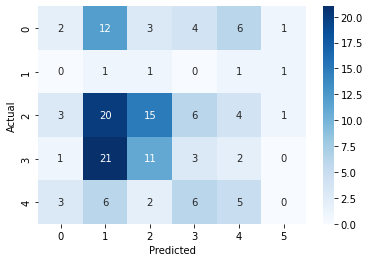

In [13]:
confusion_matrix = pd.crosstab(Y_train, labels, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### Test values

In [14]:
y_pred=model.predict(X_test)

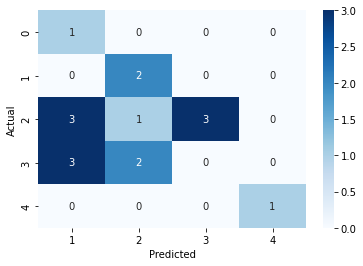

In [15]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

Observations:

 * STD works great to identify the N3 segments
 * STD works fairly well to identify periods awake and N2
 * STD doesn't seem to be working on REM idenntification
 * The low count of N1 segments makes it difficult to assess its accuracy.
 * It should be considered that it is possible that the third group of STD corresponds to epileptic seizures.

## Medians: Lobes

Now we will obtain the average value for each band dividing each chanel into lobes. The lobes taken into account were: Frontal, occipital, parietal, temporal and central(even though it isn't a cerebral lobe, it doesn't share the same characheristics as the frontal or parietal lobes).

#### Importing the data

In [16]:
data=pd.read_csv("Data_medians_lobes.csv")

In [17]:
del data['Unnamed: 0']

In [18]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

#### Adapting the data

In [19]:
data_2=data.dropna()

In [20]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:35])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.9)]
X_test=X[int(len(X)*0.9):]

Y_train=Y[:int(len(X)*0.9)]
Y_test=Y[int(len(X)*0.9):]

#### Defining a Kmeans model

In [21]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [22]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

In [23]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

#### Train values

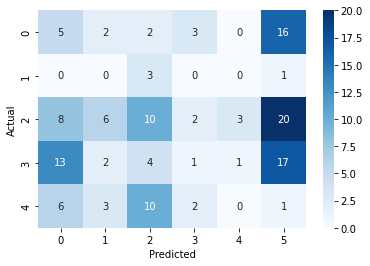

In [24]:
confusion_matrix = pd.crosstab(Y_train, labels, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### Test values

In [25]:
y_pred=model.predict(X_test)

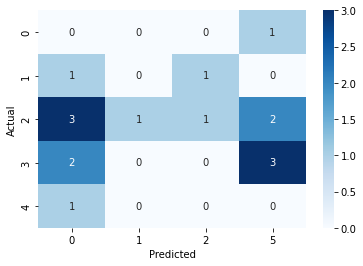

In [26]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

Observations:
* Lobe method confuses N2 with N3
* Moderately defined awake periods
* First and last group very similar: One may correspond to epilepsy

## Data_medians_horizontal

This data consist on horizontal bipolar derivations, simlar to the double bannana, but in a perpendicular direction. 

#### Importing the data

In [27]:
data=pd.read_csv("Data_medians_horizontal.csv")

#### Adapting the data

In [28]:
del data['Unnamed: 0']

In [29]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

In [30]:
data_2=data.dropna()

In [31]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:35])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.9)]
X_test=X[int(len(X)*0.9):]

Y_train=Y[:int(len(X)*0.9)]
Y_test=Y[int(len(X)*0.9):]

#### Defining a Kmeans model

In [32]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [33]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

In [34]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

#### Train values

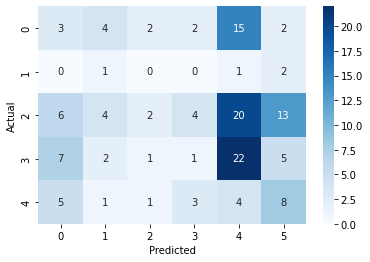

In [35]:
confusion_matrix = pd.crosstab(Y_train, labels, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### Test values

In [36]:
y_pred=model.predict(X_test)

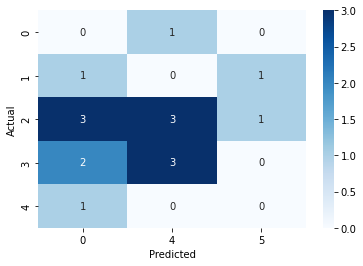

In [37]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

Observations:
* Two groups correspond to N2 and N3. Possibly one corresponds to segments with attacks
* No group is particularly defined

## Data_medians_vertical

Median values of the vertical bipolar derivations. Very similar to the first test but instead of using the standard derivation among the values, we will use the mean value of medians. 

#### Importing the data

In [38]:
data=pd.read_csv("Data_medians_vertical.csv")

#### Adapting the data

In [39]:
del data['Unnamed: 0']

In [40]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

In [41]:
data_2=data.dropna()

In [42]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:35])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.9)]
X_test=X[int(len(X)*0.9):]

Y_train=Y[:int(len(X)*0.9)]
Y_test=Y[int(len(X)*0.9):]

#### Defining a Kmeans model

In [43]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [44]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

In [45]:
data_2=data.dropna()

#### Train values

In [46]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

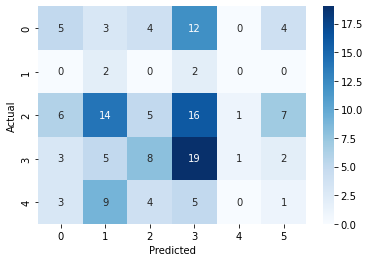

In [47]:
confusion_matrix = pd.crosstab(Y_train, labels, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### Test values

In [48]:
y_pred=model.predict(X_test)

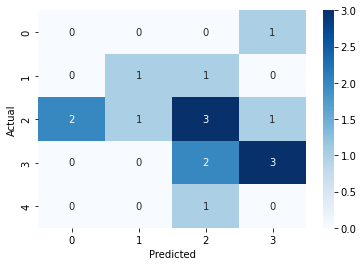

In [49]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

## Data_lobes_std

Single electrode recordings with the electrodes classified into lobes. The value of intrest here is the standard derivation in a single class of electodes. Lets remember that the median value wasn't very accurate in the correct classification of N2 and N3 fragments. We hope that the electrophisiological properties of each stage are more distinguishable by using the standard derivation.

#### Importing the data

In [50]:
data=pd.read_csv("Data_medians_3.csv")

#### Adapting the data

In [51]:
del data['Unnamed: 0']

In [52]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

In [53]:
data_2=data.dropna()

In [54]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:25])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.9)]
X_test=X[int(len(X)*0.9):]

Y_train=Y[:int(len(X)*0.9)]
Y_test=Y[int(len(X)*0.9):]

#### Defining a Kmeans model

In [55]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [56]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

#### Train values

In [57]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

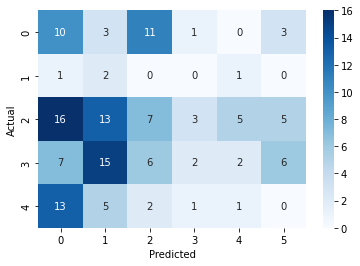

In [58]:
confusion_matrix = pd.crosstab(Y_train, labels, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### Test values

In [59]:
y_pred=model.predict(X_test)

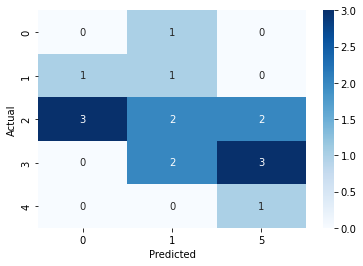

In [60]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [61]:
np.std(centroids,axis=0)

array([1.08912329, 1.14311969, 1.18017778, 1.11377733, 1.12645758,
       1.19582709, 1.21581103, 1.3011146 , 1.2862425 , 1.26648961,
       1.28193229, 1.3443479 , 1.10953576, 1.14544438, 1.13830036,
       1.20017518, 1.25110601, 1.22125873, 0.23800967])

Observations: 
* Even though the correct classification of N2 and N3 fragments improved, the REM stage accuracy greatly decreased.
* Awake periods also experienced a decreased accuracy. 

## Data_lobes_mean

We already tried the median value and the standard deviation for the lobe analysis. Each had it's strenghts and weaknesses. We hope the mean value is able to provide information both about the skewness of the PSD and the main frequency. 

#### Importing the data

In [62]:
data=pd.read_csv("Data_medians_lobe_STD.csv")

#### Adapting the data

In [63]:
del data['Unnamed: 0']

In [64]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

In [65]:
data_2=data.dropna()

In [66]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:25])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.9)]
X_test=X[int(len(X)*0.9):]

Y_train=Y[:int(len(X)*0.9)]
Y_validate=Y[int(len(X)*0.9):]

#### Defining a Kmeans model

In [67]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [68]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

In [69]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

#### Train values

In [70]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

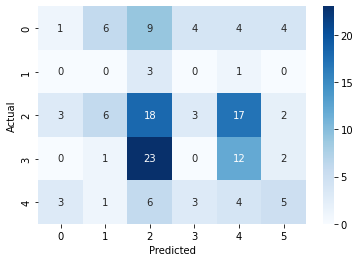

In [71]:
confusion_matrix = pd.crosstab(Y_train, labels, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### Test values

In [72]:
y_pred=model.predict(X_test)

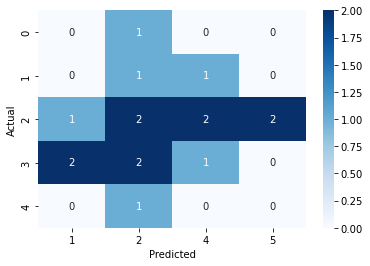

In [73]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

Observations:
* Somehow we have worse results than with the median and with the STD.
* Maybe the best parameter group includes both the median and the STD, but with a generalized version of parameters. 

## Data_lobes_std+medians

Now we will try to use the two best parameter groups and hope that the algorithm won't be over adjusted to the data. 

#### Importing the data

In [74]:
data=pd.read_csv("Data_medians_4.csv")

#### Adapting the data

In [75]:
del data['Unnamed: 0']

In [76]:
del data['38']

In [77]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data)):
    if data.iloc[i,-1]=='Awake':
        data.iloc[i,-1]=0
    elif data.iloc[i,-1]=='N1':
        data.iloc[i,-1]=1
    elif data.iloc[i,-1]=='N2':
        data.iloc[i,-1]=2
    elif data.iloc[i,-1]=='N3':
        data.iloc[i,-1]=3
    elif data.iloc[i,-1]=='REM':
        data.iloc[i,-1]=4
    else:
        data.iloc[i,-1]=np.nan

In [78]:
data_2=data.dropna()

In [79]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:17])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.85)]
X_test=X[int(len(X)*0.85):]

Y_train=Y[:int(len(X)*0.85)]
Y_test=Y[int(len(X)*0.85):]

#### Defining a Kmeans model

In [80]:
# Run local implementation of kmeans
model = KMeans(n_clusters=6, max_iter=100, init='random',n_init=10)

In [81]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=6)

In [82]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

#### Train values

In [83]:
y_pred=model.predict(X_train)

In [84]:
np.shape(Y)

(157,)

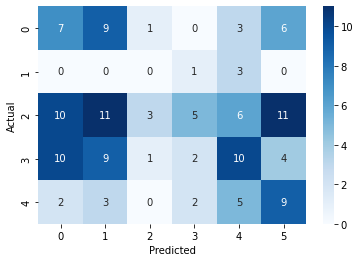

In [85]:
confusion_matrix = pd.crosstab(Y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [86]:
np.shape(centroids)

(6, 17)

In [87]:
np.std(centroids,axis=0)

array([1.26601683, 1.28540547, 1.35008946, 1.27022676, 1.3402466 ,
       1.37344528, 1.46526602, 1.47331292, 1.48005938, 1.48687448,
       1.50745716, 1.53316163, 1.309417  , 1.42549936, 1.37483582,
       1.40727895, 1.51800124])

#### Test values

In [88]:
y_pred=model.predict(X_test)

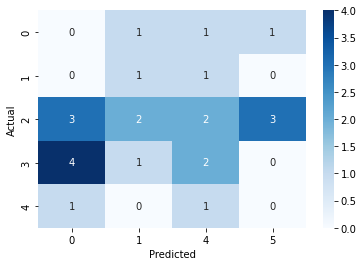

In [89]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

## Keras

In [90]:
from sklearn.neighbors import KNeighborsClassifier

The following series of experiments take means and standard deviations of the 6 main areas: Frontal, left temporal, right temporal, central, parietal and occipital. 10-second segments were taken that were not on the border of a sleep stage. A PSD was obtained for each segment and for each electrode. The first three quintiles were calculated for each PSD (ie when the area under the curve corresponded to 20%, 40% and 60% of the total area). Finally, the average of each quintile was obtained for each area and for all the segments of the same sleep phase, as well as the standard deviation.

Finally, the activity and mobility of each stage were calculated. These two values ​​are two of the Hjorth parameters and are calculated as:

Activity $\rightarrow A=\sigma_0^2$

Mobility $\rightarrow M=\frac{\sigma_1}{\sigma_0}$

Where $\sigma_i$ represents the variance of the ith derivative of the EEG recording. That is, $\sigma_0$ is the variance of the raw EEG values. For the Hjorth parameters, all available electrodes were collapsed.

In [275]:
data=pd.read_csv("Data_medians_4.csv")
del data['Unnamed: 0']
del data['38']

In [276]:
for i in range(0,len(data)):
    if data.iloc[i,-1]!='Awake':
        if data.iloc[i,-1]!='N1':
            if data.iloc[i,-1]!='N2':
                if data.iloc[i,-1]!='N3':
                    if data.iloc[i,-1]!='REM':
                        data.iloc[i,-1]=np.nan

In [143]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,39
0,19.911429,21.826667,19.901111,19.076667,21.918889,14.850000,58.638571,60.644444,61.956667,57.580000,...,210.934721,627.235043,648.175431,626.022091,643.377231,540.470154,495.039453,4.422272e+07,0.001152,Awake
1,40.660000,35.816667,38.405556,42.591111,40.958889,37.191667,148.707143,114.740000,116.255556,180.642222,...,601.949326,2122.510839,1710.063114,1684.448166,3062.885569,2100.222584,1750.616297,2.508360e+06,0.002201,N2
2,28.203333,24.951111,25.603333,33.302222,28.286667,24.416667,104.157619,78.117778,77.450000,141.416667,...,395.701329,1433.984345,1147.643210,1131.199674,2268.983257,1375.903119,1170.567469,1.469640e+06,0.001673,REM
3,18.286190,16.575556,17.173333,22.212222,18.586667,15.928333,72.619048,55.015556,55.386667,98.113333,...,258.530174,951.861362,774.702891,776.389821,1493.072896,943.001124,787.208156,5.040967e+06,0.002785,N2
4,11.339524,10.327778,11.073333,9.653333,12.070000,10.046667,42.745238,33.640000,34.700000,37.300000,...,156.242749,587.817203,465.337699,467.104798,546.078070,612.918988,465.555425,9.224363e+06,0.001658,N3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23.572857,21.060000,22.835556,24.652222,19.970000,18.556667,62.023810,55.311111,62.484444,65.027778,...,233.876713,956.606279,901.840306,1079.626406,1000.445620,627.724242,663.898963,1.033058e+05,0.000996,REM
161,18.736190,16.664444,17.992222,19.476667,16.011111,14.800000,47.885238,42.373333,47.960000,49.993333,...,179.285611,731.916047,694.028468,835.901439,759.237127,474.306587,509.926345,3.701008e+04,0.000528,N1
162,14.926190,13.685556,14.278889,15.434444,12.957778,11.726667,37.418571,33.524444,37.350000,38.766667,...,137.755238,558.178258,505.701924,648.375509,566.989604,363.330987,390.608436,9.521701e+04,0.000363,N2
163,10.816190,9.702222,10.213333,10.985556,9.072222,8.145000,27.838095,24.458889,27.936667,28.534444,...,99.599288,449.385031,411.347601,560.246779,459.417619,270.892424,296.452757,6.754039e+06,0.000063,N3


In [94]:
data_2=data.dropna()

In [95]:
# Standardize the data
X = StandardScaler().fit_transform(data_2.iloc[:,:35])

Y=data_2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.75)]
X_test=X[int(len(X)*0.75):]

Y_train=Y[:int(len(X)*0.75)]
Y_test=Y[int(len(X)*0.75):]

In [96]:
k_neighbor=KNeighborsClassifier(5)

In [97]:
print(np.shape(X_train))
print(np.shape(Y_train))

(117, 35)
(117,)


In [98]:
Y_train

array(['Awake', 'N2', 'REM', 'N2', 'N3', 'REM', 'N3', 'REM', 'N2', 'N3',
       'REM', 'Awake', 'N2', 'N2', 'N3', 'REM', 'Awake', 'N2', 'N2', 'N3',
       'N3', 'Awake', 'REM', 'N2', 'Awake', 'N2', 'N3', 'REM', 'N3',
       'REM', 'Awake', 'REM', 'Awake', 'Awake', 'N2', 'Awake', 'N3',
       'Awake', 'N2', 'N3', 'REM', 'N2', 'N3', 'N2', 'N1', 'N2', 'N3',
       'N2', 'N1', 'N3', 'N3', 'N2', 'N2', 'REM', 'N2', 'Awake', 'N3',
       'N2', 'N3', 'N2', 'Awake', 'N2', 'N3', 'Awake', 'N2', 'Awake',
       'REM', 'N2', 'Awake', 'N2', 'N3', 'N2', 'N3', 'N2', 'N2', 'N3',
       'Awake', 'N1', 'Awake', 'Awake', 'N2', 'N3', 'REM', 'N2', 'N3',
       'N2', 'Awake', 'N3', 'N2', 'N3', 'N2', 'N3', 'REM', 'N2', 'N2',
       'N3', 'N2', 'N2', 'REM', 'N3', 'REM', 'N2', 'Awake', 'N2', 'N3',
       'N2', 'N3', 'N2', 'N3', 'REM', 'Awake', 'N2', 'N3', 'REM', 'N3',
       'REM', 'N2'], dtype=object)

In [99]:
k_neighbor.fit(X_train,Y_train)

KNeighborsClassifier()

In [100]:
y_pred=k_neighbor.predict(X_train)

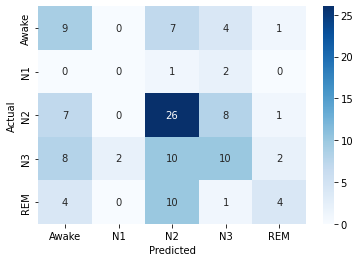

In [101]:
confusion_matrix = pd.crosstab(Y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [102]:
sum(confusion_matrix.iloc[i,i] for i in range(0,len(confusion_matrix)))/len(Y_train)

0.4188034188034188

In [103]:
y_pred=k_neighbor.predict(X_test)

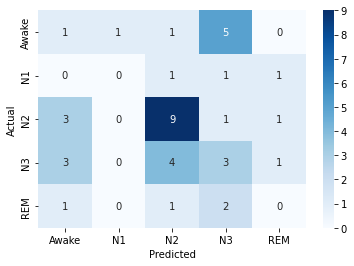

In [104]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [105]:
sum(confusion_matrix.iloc[i,i] for i in range(0,len(confusion_matrix)))/len(Y_test)

0.325

## Comparison between sections

From the last lesson we learned that epileptic attacks occur mostly in the N2 and N3 sleep stages. So now we will try to split the sub-segemnts of each stage into two clusters. We expect that, with the correct set of paramteters, one of the clusters will correspond to epileptic seizures and the other will correspond to normal recordings.  

Please note that this classification can't be evaluated and validated because there are not markings that allow us to compare the results to a gold standard. 

### N2

In [260]:
data_c=data

In [261]:
for i in range(0,len(data)):
    if data.iloc[i,-1]!="N2":
        data_c.iloc[i,-1]=np.nan

In [262]:
data_c=data_c.dropna()

In [263]:
# Standardize the data
X = StandardScaler().fit_transform(data_c.iloc[:,:37])

X_train=X[:int(len(X)*0.75)]

In [264]:
# Run local implementation of kmeans
model = KMeans(n_clusters=2, max_iter=100, init='random',n_init=10)

In [265]:
model.fit(X)

KMeans(init='random', max_iter=100, n_clusters=2)

In [266]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

In [267]:
centroids

array([[-0.61783467, -0.62070957, -0.61891999, -0.62231813, -0.59319319,
        -0.58682692, -0.58719187, -0.59447495, -0.57491152, -0.58687597,
        -0.55478317, -0.55559992, -0.54025856, -0.6013481 , -0.56503859,
        -0.55747612, -0.56713299, -0.56355206, -0.61688024, -0.62213048,
        -0.62049631, -0.6234374 , -0.59625971, -0.59148912, -0.58258563,
        -0.59645084, -0.57565797, -0.58404583, -0.5579193 , -0.56066686,
        -0.52861544, -0.60169546, -0.55909407, -0.55051283, -0.56889795,
        -0.56726235,  0.03406   ],
       [ 1.11210241,  1.11727723,  1.11405598,  1.12017263,  1.06774773,
         1.05628846,  1.05694536,  1.07005492,  1.03484073,  1.05637674,
         0.99860971,  1.00007986,  0.9724654 ,  1.08242657,  1.01706945,
         1.00345702,  1.02083938,  1.0143937 ,  1.11038443,  1.11983486,
         1.11689335,  1.12218731,  1.07326748,  1.06468042,  1.04865413,
         1.07361151,  1.03618435,  1.0512825 ,  1.00425474,  1.00920034,
         0.95150

In [268]:
centroids[0]-centroids[1]

array([-1.72993707, -1.7379868 , -1.73297596, -1.74249076, -1.66094092,
       -1.64311539, -1.64413722, -1.66452987, -1.60975225, -1.64325271,
       -1.55339288, -1.55567978, -1.51272396, -1.68377467, -1.58210804,
       -1.56093315, -1.58797237, -1.57794576, -1.72726467, -1.74196534,
       -1.73738966, -1.74562471, -1.66952719, -1.65616955, -1.63123976,
       -1.67006235, -1.61184232, -1.63532833, -1.56217404, -1.5698672 ,
       -1.48012322, -1.68474729, -1.56546341, -1.54143592, -1.59291426,
       -1.58833459,  0.09536801])

In [269]:
#To obtain the labels of each cluster
labels = model.labels_

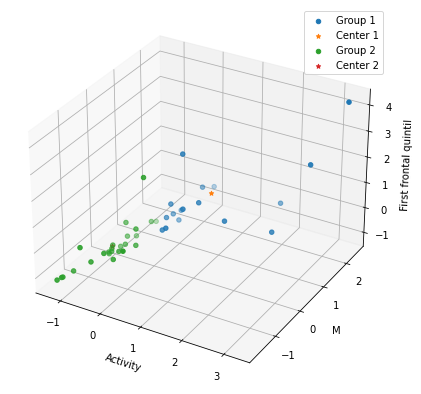

In [291]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x=-2
y=1
z=30
ax.scatter3D(X[labels>0][:,x],X[labels>0][:,y],X[labels>0][:,z],label="Group 1")
ax.scatter3D(centroids[1,x],centroids[1,y],centroids[1,0],label="Center 1",marker='*')
ax.scatter3D(X[labels<1][:,x],X[labels<1][:,y],X[labels<1][:,z],label="Group 2")
ax.scatter3D(centroids[0,x],centroids[0,y],centroids[0,z],label="Center 2",marker='*')
ax.set_ylabel("M")
ax.set_xlabel("Activity")
ax.set_zlabel("First frontal quintil")
ax.legend()


Observations: 

* The first group has the mayority of points and is more compact than the second group.
* The sub-segments that are classified in the second group have more extreme parameters. This might be due to the precence of an artifact or because it corresponds to a epileptic seizure. 
* Based on the positions of the centroids we can infer that, if the clasification is correct, the first group corresponds to epileptic seizures and the second group to normal recodings. 
* Every single parameter is higher in the first group except the movility. 

### N3

In [277]:
data_c=data

In [278]:
for i in range(0,len(data)):
    if data.iloc[i,-1]!="N3":
        data_c.iloc[i,-1]=np.nan

In [279]:
data_c=data_c.dropna()

In [280]:
data_c

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,39
4,11.339524,10.327778,11.073333,9.653333,12.070000,10.046667,42.745238,33.640000,34.700000,37.300000,...,156.242749,587.817203,465.337699,467.104798,546.078070,612.918988,465.555425,9.224363e+06,0.001658,N3
6,26.998571,26.215556,29.127778,29.162222,28.964444,28.295000,61.641429,60.512222,82.962222,74.073333,...,399.858713,875.714794,795.695026,1081.203383,976.650182,1007.277740,1048.574140,2.324112e+07,0.000369,N3
9,10.481905,10.418889,11.724444,11.373333,10.986667,10.811667,25.147143,24.993333,33.655556,28.965556,...,144.186463,329.504906,299.966163,400.458743,347.526865,350.097442,367.198218,3.268244e+07,0.000392,N3
14,34.483810,39.271111,39.704444,42.848889,52.626667,48.441667,87.269048,112.805556,105.626667,113.292222,...,660.603977,810.729764,1178.118628,1073.187894,1112.275571,1286.495199,1287.632856,4.220465e+07,0.001066,N3
20,12.452381,13.240000,13.191111,12.627778,13.446667,12.915000,25.688571,26.050000,26.112222,24.443333,...,129.994494,235.258307,273.743060,243.592546,257.479009,283.038934,254.441075,1.402703e+08,0.000571,N3
22,19.874286,17.511111,15.896667,18.567778,17.408889,16.461667,44.143333,35.455556,31.470000,38.522222,...,168.509782,466.936157,369.663944,313.986636,401.507249,355.099730,326.303332,3.574233e+08,0.000113,N3
29,31.032857,29.833333,29.096667,26.802222,27.352222,28.403333,58.532857,54.425556,53.760000,52.906667,...,279.149177,601.866864,564.956831,556.644310,581.754025,529.543763,548.070935,2.867187e+08,0.000065,N3
32,20.797619,19.597778,19.213333,17.788889,17.948889,18.641667,39.318571,36.075556,35.627778,35.066667,...,183.913391,396.192725,369.603986,365.086165,380.098674,346.435712,360.993817,2.020305e+08,0.000056,N3
41,17.056190,15.736667,17.441111,18.685556,18.053333,16.200000,38.504286,36.480000,38.413333,39.751111,...,173.948698,390.992855,354.784589,378.417194,408.356892,385.593292,350.101424,3.644143e+08,0.000212,N3
44,22.938571,20.206667,24.743333,23.447778,24.880000,20.580000,58.670000,48.557778,63.928889,59.466667,...,262.032101,660.175106,555.743070,728.627763,655.188247,701.497471,598.048333,9.533055e+07,0.000159,N3


In [281]:
# Standardize the data
X = StandardScaler().fit_transform(data_c.iloc[:,:37])

X_train=X[:int(len(X)*0.75)]

In [282]:
# Run local implementation of kmeans
model = KMeans(n_clusters=2, max_iter=100, init='random',n_init=10)

In [283]:
model.fit(X)

KMeans(init='random', max_iter=100, n_clusters=2)

In [284]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

In [285]:
centroids

array([[-0.64964254, -0.6815972 , -0.67942243, -0.69552458, -0.66342762,
        -0.65778521, -0.5672297 , -0.62505204, -0.60532614, -0.65701589,
        -0.60123016, -0.60505296, -0.46140856, -0.60179224, -0.56834737,
        -0.5995568 , -0.59374292, -0.59748114, -0.64739909, -0.68397253,
        -0.68063912, -0.69657243, -0.66741894, -0.66177207, -0.55731341,
        -0.62274631, -0.60417314, -0.65545354, -0.60671598, -0.60803878,
        -0.44493434, -0.59889663, -0.55865237, -0.59770227, -0.5982442 ,
        -0.59926305,  0.20382363],
       [ 0.9022813 ,  0.94666278,  0.94364226,  0.96600637,  0.92142726,
         0.91359058,  0.78781903,  0.86812783,  0.84073075,  0.91252208,
         0.83504189,  0.84035134,  0.64084523,  0.83582256,  0.78937134,
         0.83271777,  0.82464295,  0.82983492,  0.89916541,  0.94996185,
         0.94533212,  0.96746171,  0.92697076,  0.91912787,  0.77404641,
         0.86492543,  0.83912937,  0.91035214,  0.84266109,  0.84449831,
         0.61796

In [286]:
centroids[0]-centroids[1]

array([-1.55192384, -1.62825998, -1.62306469, -1.66153095, -1.58485488,
       -1.57137579, -1.35504874, -1.49317986, -1.44605689, -1.56953797,
       -1.43627205, -1.44540431, -1.10225379, -1.43761481, -1.35771871,
       -1.43227457, -1.41838587, -1.42731607, -1.5465645 , -1.63393438,
       -1.62597124, -1.66403414, -1.5943897 , -1.58089994, -1.33135982,
       -1.48767174, -1.44330251, -1.56580567, -1.44937707, -1.45253709,
       -1.0628987 , -1.4306975 , -1.33455845, -1.42784432, -1.42913892,
       -1.43157284,  0.486912  ])

In [287]:
#To obtain the labels of each cluster
labels = model.labels_

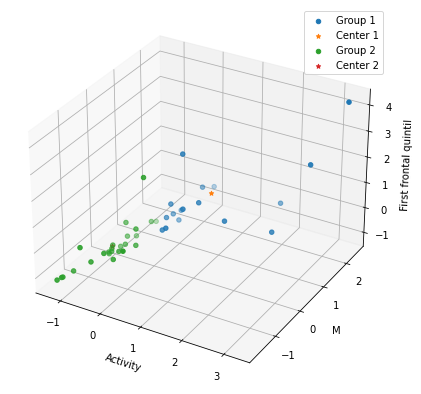

In [290]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x=-2
y=1
z=30
ax.scatter3D(X[labels>0][:,x],X[labels>0][:,y],X[labels>0][:,z],label="Group 1")
ax.scatter3D(centroids[1,x],centroids[1,y],centroids[1,0],label="Center 1",marker='*')
ax.scatter3D(X[labels<1][:,x],X[labels<1][:,y],X[labels<1][:,z],label="Group 2")
ax.scatter3D(centroids[0,x],centroids[0,y],centroids[0,z],label="Center 2",marker='*')
ax.set_ylabel("M")
ax.set_xlabel("Activity")
ax.set_zlabel("First frontal quintil")
ax.legend()


Observations:

* The results are very similar to the ones obtained in the N2 stage
* The first group corresponds to the more extreme data while the second one has the mayority of the sub-segments 
* All the parameters expect the mobility are higher in the first goup 

## Temporal lobe collapse

In order to reduce the number of parameters we will colapse the parameters of the two two temporal lobes into a single group. 

In [178]:
data=pd.read_csv("Data_medians_4.csv")
del data['Unnamed: 0']
del data['38']

In [179]:
data_t=data

In [180]:
data_t

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,39
0,19.911429,21.826667,19.901111,19.076667,21.918889,14.850000,58.638571,60.644444,61.956667,57.580000,...,210.934721,627.235043,648.175431,626.022091,643.377231,540.470154,495.039453,4.422272e+07,0.001152,Awake
1,40.660000,35.816667,38.405556,42.591111,40.958889,37.191667,148.707143,114.740000,116.255556,180.642222,...,601.949326,2122.510839,1710.063114,1684.448166,3062.885569,2100.222584,1750.616297,2.508360e+06,0.002201,N2
2,28.203333,24.951111,25.603333,33.302222,28.286667,24.416667,104.157619,78.117778,77.450000,141.416667,...,395.701329,1433.984345,1147.643210,1131.199674,2268.983257,1375.903119,1170.567469,1.469640e+06,0.001673,REM
3,18.286190,16.575556,17.173333,22.212222,18.586667,15.928333,72.619048,55.015556,55.386667,98.113333,...,258.530174,951.861362,774.702891,776.389821,1493.072896,943.001124,787.208156,5.040967e+06,0.002785,N2
4,11.339524,10.327778,11.073333,9.653333,12.070000,10.046667,42.745238,33.640000,34.700000,37.300000,...,156.242749,587.817203,465.337699,467.104798,546.078070,612.918988,465.555425,9.224363e+06,0.001658,N3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23.572857,21.060000,22.835556,24.652222,19.970000,18.556667,62.023810,55.311111,62.484444,65.027778,...,233.876713,956.606279,901.840306,1079.626406,1000.445620,627.724242,663.898963,1.033058e+05,0.000996,REM
161,18.736190,16.664444,17.992222,19.476667,16.011111,14.800000,47.885238,42.373333,47.960000,49.993333,...,179.285611,731.916047,694.028468,835.901439,759.237127,474.306587,509.926345,3.701008e+04,0.000528,N1
162,14.926190,13.685556,14.278889,15.434444,12.957778,11.726667,37.418571,33.524444,37.350000,38.766667,...,137.755238,558.178258,505.701924,648.375509,566.989604,363.330987,390.608436,9.521701e+04,0.000363,N2
163,10.816190,9.702222,10.213333,10.985556,9.072222,8.145000,27.838095,24.458889,27.936667,28.534444,...,99.599288,449.385031,411.347601,560.246779,459.417619,270.892424,296.452757,6.754039e+06,0.000063,N3


To collapse the values of both temporal lobes, we must find a way to calculate averages and standard deviations of two groups of the same size. Average is pretty straightforward. Just remember the equations:

$M_1=\frac{1}{n_1} \sum_{n=1}^{n_1} X_n$

$M_2=\frac{1}{n_2} \sum_{n=1}^{n_2} Y_n$

$M_t= \frac{1}{n_1+n_2} (\sum_{n=1}^{n_1} X_n + \sum_{n=1}^{n_2} Y_n)$

Note that $n_1=n_2=N$, so:

$M_t= \frac{1}{2 N} (\sum_{n=1}^{N} X_n + \sum_{n=1}^{N} Y_n)$

$\therefore M_t=\frac{M_1+M_2}{2}$

In [159]:
for i in range(0,len(data_t)):
     #We collapse the averages of the first quintile
    data_t.iloc[i,1]=(data.iloc[i,1]+data.iloc[i,2])/2
     # We collapse the averages of the second quintile
    data_t.iloc[i,7]=(data.iloc[i,7]+data.iloc[i,8])/2
     # We collapse the averages of the third quintile
    data_t.iloc[i,13]=(data.iloc[i,13]+data.iloc[i,14])/2
    
#Remove collapsed data columns
del data_t['2']
del data_t["8"]
del data_t["14"]

Now we are going to collapse the standard deviations. Let us remember that:

$S_1=\sqrt{\frac{1}{n_1}\sum_{i=1}^{n_1}(x_i-\bar{x}_1)^2}$

$S_2=\sqrt{\frac{1}{n_2}\sum_{i=1}^{n_2}(y_i-\bar{y}_2)^2}$

$S_t=\sqrt{\frac{1}{2N}\sum_{i=1}^{N}(x_i-\bar{y})^2+(y_i-\bar{y})^2}$

En donde $\bar{y}=\frac{\bar{x}_1+\bar{y}_2}{2}$

$\rightarrow S_t= \sqrt{\frac{1}{2N}\sum_{i=1}^{N}(x_i-\frac{\bar{x}_1+\bar{y}_2}{2})^2+(y_i-\frac{\bar{x}_1+\bar{y}_2}{2})^2}$

$\rightarrow S_t= \sqrt{\frac{1}{2N}\sum_{i=1}^{N}x_i^2-x_i(\bar{x}_1+\bar{y}_2)+\frac{(\bar{x}_1+\bar{y}_2)^2}{4}+y_i^2-y_i(\bar{x}_1+\bar{y}_2)+\frac{(\bar{x}_1+\bar{y}_2)^2}{4}}$

$\rightarrow S_t= \sqrt{\frac{1}{2N}\sum_{i=1}^{N}x_i^2-(x_i+y_i)(\bar{x}_1+\bar{y}_2)+\frac{(\bar{x}_1+\bar{y}_2)^2}{2}+y_i^2}$

$\rightarrow S_t= \sqrt{\frac{1}{2N}\sum_{i=1}^{N}x_i^2-(x_i\bar{x}_1+x_i\bar{y}_2+y_i\bar{x}_1+y_i\bar{y}_2)+\frac{(\bar{x}_1+\bar{y}_2)^2}{2}+y_i^2}$

From the standard deviations of the individual groups we can derive that:

$n_1 S_1^2=\sum_{i=1}^{n_1}(x_i-\bar{x})^2$

$n_2 S_2^2=\sum_{i=1}^{n_2}(y_i-\bar{y})^2$

$S_t=\sqrt{\frac{1}{2N}(NS_1^2+NS_2^2+N(\bar{y}_1−\bar{y})^2+N(\bar{y}_2−\bar{y})^2)}$

$\therefore S_t=\sqrt{\frac{1}{2}(S_1^2+S_2^2+(\bar{y}_1−\bar{y})^2+(\bar{y}_2−\bar{y})^2)}$

In [160]:
data_t.loc[0,'1']

20.863888888888887

In [161]:
for i in range(0,len(data_t)):
     #We collapse the standard deviations of the first quintile
    data_t.iloc[i,19]=((data.iloc[i,19]**2+data.iloc[i,20]**2+(data.iloc[i,1]-data_t.loc[i ,'1'])**2+(data.iloc[i,2]-data_t.loc[i,'1'])**2)/2)**0.5
     # We collapse the standard deviations of the second quintile
    data_t.iloc[i,25]=((data.iloc[i,25]**2+data.iloc[i,26]**2+(data.iloc[i,7]-data_t.loc[i ,'7'])**2+(data.iloc[i,8]-data_t.loc[i,'7'])**2)/2)**0.5
     # We collapse the standard deviations of the third quintile
    data_t.iloc[i,31]=((data.iloc[i,31]**2+data.iloc[i,32]**2+(data.iloc[i,13]-data_t.loc[i ,'13'])**2+(data.iloc[i,14]-data_t.loc[i,'13'])**2)/2)**0.5
    
#Remove collapsed data columns
del data_t['20']
del data_t['26']
del data_t['32']

In [162]:
np.shape(data_t)

(165, 33)

Notice that we managed to go down 6 dimensions.

### K means

In [163]:
# 0: Awake
# 1: N1
# 2: N2
# 3: N3
# 4: REM

for i in range(0,len(data_t)):
    if data_t.iloc[i,-1]=='Awake':
        data_t.iloc[i,-1]=0
    elif data_t.iloc[i,-1]=='N1':
        data_t.iloc[i,-1]=1
    elif data_t.iloc[i,-1]=='N2':
        data_t.iloc[i,-1]=2
    elif data_t.iloc[i,-1]=='N3':
        data_t.iloc[i,-1]=3
    elif data_t.iloc[i,-1]=='REM':
        data_t.iloc[i,-1]=4
    else:
        data_t.iloc[i,-1]=np.nan

In [164]:
data_t2=data_t.dropna()

In [165]:
data_t2

,0,1,3,4,5,6,7,9,10,11,...,28,29,30,31,33,34,35,36,37,39
0,19.911429,20.863889,19.076667,21.918889,14.850000,58.638571,61.300556,57.580000,54.570000,43.411667,...,240.741312,210.934721,627.235043,648.175431,643.377231,518.721683,495.039453,4.422272e+07,0.001152,0
1,40.660000,37.111111,42.591111,40.958889,37.191667,148.707143,115.497778,180.642222,136.624444,117.346667,...,663.806544,601.949326,2122.510839,1710.063114,3062.885569,1934.006195,1750.616297,2.508360e+06,0.002201,2
2,28.203333,25.277222,33.302222,28.286667,24.416667,104.157619,77.783889,141.416667,91.605556,77.440000,...,439.829679,395.701329,1433.984345,1147.643210,2268.983257,1277.791388,1170.567469,1.469640e+06,0.001673,4
3,18.286190,16.874444,22.212222,18.586667,15.928333,72.619048,55.201111,98.113333,65.053333,53.331667,...,293.769864,258.530174,951.861362,774.702891,1493.072896,868.889384,787.208156,5.040967e+06,0.002785,2
4,11.339524,10.700556,9.653333,12.070000,10.046667,42.745238,34.170000,37.300000,41.403333,33.041667,...,179.658886,156.242749,587.817203,465.337699,546.078070,544.583428,465.555425,9.224363e+06,0.001658,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23.572857,21.947778,24.652222,19.970000,18.556667,62.023810,58.897778,65.027778,46.384444,46.100000,...,235.548155,233.876713,956.606279,901.840306,1000.445620,648.364502,663.898963,1.033058e+05,0.000996,4
161,18.736190,17.328333,19.476667,16.011111,14.800000,47.885238,45.166667,49.993333,35.975556,35.510000,...,180.235205,179.285611,731.916047,694.028468,759.237127,494.270849,509.926345,3.701008e+04,0.000528,1
162,14.926190,13.982222,15.434444,12.957778,11.726667,37.418571,35.437222,38.766667,28.706667,27.921667,...,139.774550,137.755238,558.178258,505.701924,566.989604,378.484287,390.608436,9.521701e+04,0.000363,2
163,10.816190,9.957778,10.985556,9.072222,8.145000,27.838095,26.197778,28.534444,20.034444,19.595000,...,101.098596,99.599288,449.385031,411.347601,459.417619,285.576327,296.452757,6.754039e+06,0.000063,3


In [166]:
# Standardize the data
X = StandardScaler().fit_transform(data_t2.iloc[:,:32])

Y=data_t2.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.85)]
X_test=X[int(len(X)*0.85):]

Y_train=Y[:int(len(X)*0.85)]
Y_test=Y[int(len(X)*0.85):]

In [167]:
# Run local implementation of kmeans
model = KMeans(n_clusters=5, max_iter=100, init='random',n_init=10)

In [168]:
model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=5)

In [169]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

In [170]:
y_pred=model.predict(X_train)

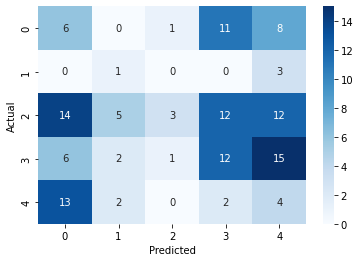

In [172]:
confusion_matrix = pd.crosstab(Y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

Observations: 

* By adding the Hjorth parameters the accuracy to identify REM stages increased, however the N2 segment indentifiaction is worse. 
* Some N2 and N3 segments have similar properties to the awake class. 
* Other N2 segments were misidentified as REM.

### K neighbors

Now we will try a clustering by neighbors method. By using this type of algorithm we hope to be able to find a big difference between the awake, NREM and REM segments. Classification between NREM stages (N1, N2, N3) might not be accurate because they correspond to a gradual progress. This means that some points of a N2 stage might be closer to a N3 segment than another N2 segment. 

In [234]:
for i in range(0,len(data_t)):
    if data_t.iloc[i,-1]!='Awake':
        if data_t.iloc[i,-1]!='N2':
            if data_t.iloc[i,-1]!='N3':
                if data_t.iloc[i,-1]!='REM':
                    data_t.iloc[i,-1]=np.nan

In [235]:
data_t

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,39
0,19.911429,21.826667,19.901111,19.076667,21.918889,14.850000,58.638571,60.644444,61.956667,57.580000,...,210.934721,627.235043,648.175431,626.022091,643.377231,540.470154,495.039453,4.422272e+07,0.001152,Awake
1,40.660000,35.816667,38.405556,42.591111,40.958889,37.191667,148.707143,114.740000,116.255556,180.642222,...,601.949326,2122.510839,1710.063114,1684.448166,3062.885569,2100.222584,1750.616297,2.508360e+06,0.002201,N2
2,28.203333,24.951111,25.603333,33.302222,28.286667,24.416667,104.157619,78.117778,77.450000,141.416667,...,395.701329,1433.984345,1147.643210,1131.199674,2268.983257,1375.903119,1170.567469,1.469640e+06,0.001673,REM
3,18.286190,16.575556,17.173333,22.212222,18.586667,15.928333,72.619048,55.015556,55.386667,98.113333,...,258.530174,951.861362,774.702891,776.389821,1493.072896,943.001124,787.208156,5.040967e+06,0.002785,N2
4,11.339524,10.327778,11.073333,9.653333,12.070000,10.046667,42.745238,33.640000,34.700000,37.300000,...,156.242749,587.817203,465.337699,467.104798,546.078070,612.918988,465.555425,9.224363e+06,0.001658,N3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23.572857,21.060000,22.835556,24.652222,19.970000,18.556667,62.023810,55.311111,62.484444,65.027778,...,233.876713,956.606279,901.840306,1079.626406,1000.445620,627.724242,663.898963,1.033058e+05,0.000996,REM
161,18.736190,16.664444,17.992222,19.476667,16.011111,14.800000,47.885238,42.373333,47.960000,49.993333,...,179.285611,731.916047,694.028468,835.901439,759.237127,474.306587,509.926345,3.701008e+04,0.000528,NaN
162,14.926190,13.685556,14.278889,15.434444,12.957778,11.726667,37.418571,33.524444,37.350000,38.766667,...,137.755238,558.178258,505.701924,648.375509,566.989604,363.330987,390.608436,9.521701e+04,0.000363,N2
163,10.816190,9.702222,10.213333,10.985556,9.072222,8.145000,27.838095,24.458889,27.936667,28.534444,...,99.599288,449.385031,411.347601,560.246779,459.417619,270.892424,296.452757,6.754039e+06,0.000063,N3


In [236]:
data_t3=data_t.dropna()

In [237]:
# Standardize the data
X = StandardScaler().fit_transform(data_t3.iloc[:,:32])

Y=data_t3.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.75)]
X_test=X[int(len(X)*0.75):]

Y_train=Y[:int(len(X)*0.75)]
Y_test=Y[int(len(X)*0.75):]

In [238]:
k_neighbor=KNeighborsClassifier(5)

In [239]:
print(np.shape(X_train))
print(np.shape(Y_train))

(113, 32)
(113,)


In [240]:
k_neighbor.fit(X_train,Y_train)

KNeighborsClassifier()

In [241]:
y_pred=k_neighbor.predict(X_train)

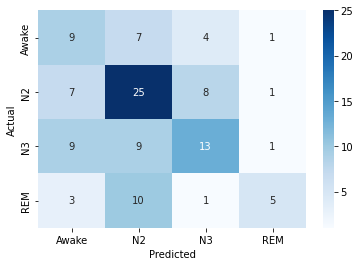

In [242]:
confusion_matrix = pd.crosstab(Y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [243]:
sum(confusion_matrix.iloc[i,i] for i in range(0,len(confusion_matrix)))/len(Y_train)

0.46017699115044247

In [244]:
y_pred=k_neighbor.predict(X_test)

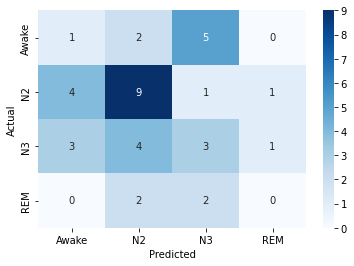

In [245]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [246]:
sum(confusion_matrix.iloc[i,i] for i in range(0,len(confusion_matrix)))/len(Y_test)

0.34210526315789475

Observations:
* Our initial hypothesis proved to be completely wrong. The results concluded the opposite to what we expected. 
* Differences beween N2 and N3 segments was outstanding. The identification of REM and Awake segments was an absolute caos. Most of the REM segments were classified as N2 and most of the awake sagments were classified as N3. 

### N1 vs N2 vs REM

Now we will try the same neighbors clustering analysis but excluding the awake segments. To distinguish between awake and asleep an ECG is a far better method than an EEG. 

In [247]:
for i in range(0,len(data_t)):
    if data_t.iloc[i,-1]!='N2':
        if data_t.iloc[i,-1]!='N3':
            if data_t.iloc[i,-1]!='REM':
                data_t.iloc[i,-1]=np.nan

In [248]:
data_t4=data_t.dropna()

In [249]:
# Standardize the data
X = StandardScaler().fit_transform(data_t4.iloc[:,:32])

Y=data_t4.iloc[:,-1].to_numpy()

X_train=X[:int(len(X)*0.75)]
X_test=X[int(len(X)*0.75):]

Y_train=Y[:int(len(X)*0.75)]
Y_test=Y[int(len(X)*0.75):]

In [250]:
k_neighbor=KNeighborsClassifier(3)

In [251]:
print(np.shape(X_train))
print(np.shape(Y_train))

(91, 32)
(91,)


In [252]:
k_neighbor.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [253]:
y_pred=k_neighbor.predict(X_train)

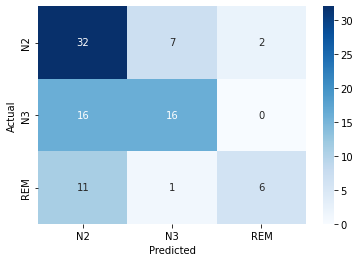

In [254]:
confusion_matrix = pd.crosstab(Y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [255]:
sum(confusion_matrix.iloc[i,i] for i in range(0,len(confusion_matrix)))/len(Y_train)

0.5934065934065934

In [256]:
y_pred=k_neighbor.predict(X_test)

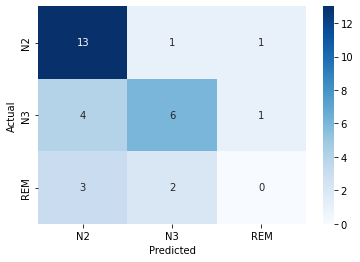

In [257]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [258]:
sum(confusion_matrix.iloc[i,i] for i in range(0,len(confusion_matrix)))/len(Y_test)

0.6129032258064516

Observations:
* This has been the best algorithm so far. 
* It has a general accuracy of 61.29% 
* There is a slight bias in the training because most of the segments correspond to the N2 stage. 
* REM identification isn't accurate

Sensibility and accuracy:
* N2: 
    * Sensitivity: 13/15=86.66%
    * PPV: 13/20=65%
* N3: 
    * Sensitivity: 6/11= 54.54%
    * PPV: 6/9= 66.66%
* REM: 
    * Sensitivity: 0%
    * PPV: 0%